# LE TRAVAIL DEMANDER

## réalisé par: ALLAMADJI DJMRASSEM Innocent

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Stochastic gradient descent, Boucle de la regression lineaire

In [48]:
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([5, 10, 15])
n_samples, n_features = X.shape
theta = np.zeros(n_features)
alpha = 0.01
n_iterations = 1000
for i in range(n_iterations):
    # Sélectionner un exemple de manière aléatoire
    random_index = np.random.randint(n_samples)
    X_i = X[random_index]
    y_i = y[random_index]
 # Calculer la prédiction et l'erreur
    y_predict = np.dot(X_i, theta)
    error = y_predict - y_i
# Mettre à jour les paramètres
    theta = theta - alpha * error * X_i
# Afficher les paramètres finaux
print(theta)

[0.53817602 2.06368451]


## Logistic Regression avec SKlean

In [49]:
from sklearn.linear_model import LogisticRegression
data= pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
def feature_standard(data):
  dmean=np.mean(data, axis=0)
  dstd=np.std(data, axis=0)
  data_scaled=(data-dmean)/dstd
  return data_scaled
Standard_data=feature_standard(data)
data.iloc[:, 0:-1]=Standard_data.iloc[:,0:-1]
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [51]:
def split_data(df, train_percent):
  np.random.seed(2)
  perm=np.random.permutation(df.index)
  n=len(df)

  train_index=int(train_percent*n)
  train=df.iloc[perm[:train_index]]
  test=df.iloc[perm[train_index:]]

  x_train=train.iloc[:, :-1]
  y_train=train.iloc[:, -1]

  x_test=test.iloc[:, :-1]
  y_test= test.iloc[:,-1]

  return x_train.values, x_test.values, y_train.values, y_test.values
x_train, x_test, y_train, y_test=split_data(data,0.8)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [52]:
# Créer une instance de l'estimateur
logreg = LogisticRegression()

# Adapter le modèle aux données d'entraînement
logreg.fit(x_train, y_train)

# Prédire les valeurs pour les données de test
y_pred = logreg.predict(x_test)
x_train, x_test, y_train, y_test=split_data(data,0.8)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [53]:
logreg

LogisticRegression()

## Logistic Regression avec SKlean

In [54]:
from sklearn.decomposition import PCA
data=pd.read_csv('Data.csv')
data.head(3)

,f1,f2,f3,f4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [55]:
def PCA(df,k):
    x=np.array(df)
    X = np.random.rand(100, 5)

  #Step1: compute the mean and normalize the data (data estimation)
    xbar=x-np.mean(x,axis=0)

  #Step2: compute covariance matrix from the normalized x
  #check the documentation to understand why rowvar=False
    cov_x=np.cov(xbar, rowvar= False)

  #Step3: Compute eigenvalues and eigenvectors
    eigvals, eigvecs=np.linalg.eig(cov_x)

  #Step4: Sort eigenvalues in descending order and use the indices sorted to sort eigenvectors
    desc_order= np.argsort(eigvals)[::-1]
    sorted_eigvals= eigvals[desc_order]
    sorted_eigvecs=eigvecs[:, desc_order]

  #Step5: Select k eigenvectors
    eigen_vec_selec=sorted_eigvecs[:,:k]

  #Step6: transform the data
    z=xbar@eigen_vec_selec

    return z

In [56]:
from sklearn.decomposition import PCA

def PCA_sklearn(df, k):
    pca = PCA(n_components=k)
    principal_components = pca.fit_transform(df)
    principal_df = pd.DataFrame(data = principal_components, columns = ['PCA1', 'PCA2'])
    return principal_df

k = 2 # reduce the data from dimension 4 to dimension 2
principal_df = PCA_sklearn(data, k)
print(principal_df.head(3))

       PCA1      PCA2
0 -2.684126  0.319397
1 -2.714142 -0.177001
2 -2.888991 -0.144949


<Axes: xlabel='PCA1', ylabel='PCA2'>

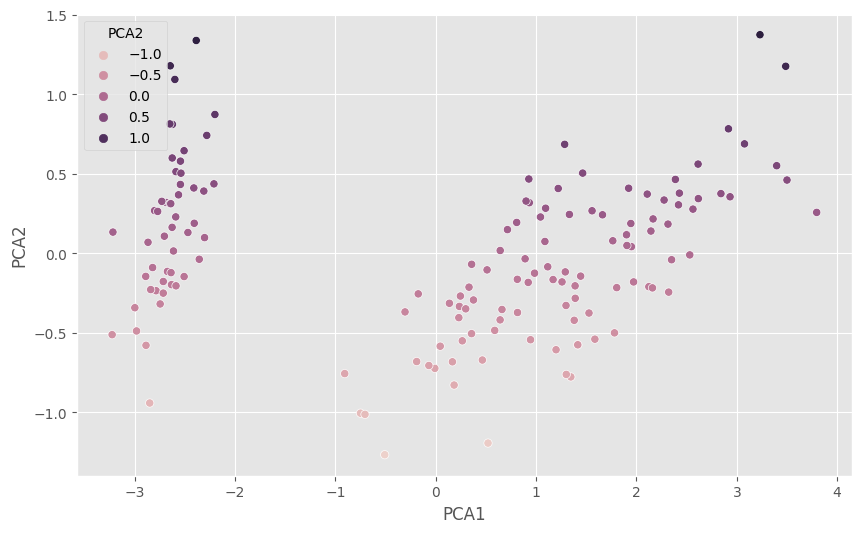

In [57]:
#Visualisez nos données transformées

plt.figure(figsize=(10,6))
plt.style.use('ggplot')
sns.scatterplot(data=principal_df, x='PCA1', y='PCA2', hue='PCA2')

## Regression lineaire avec Sklean

In [58]:
from sklearn.linear_model import LinearRegression
data = pd.read_excel('data.xlsx')

In [59]:
def standard_feature(data):
  dmean=np.mean(data, axis=0)
  dstd=np.std(data, axis=0)
  data_scaled=(data-dmean)/dstd
  return data_scaled

In [60]:
standard_data=standard_feature(data)
standard_data.head()

,X1,X2,X3,X4,Y
0,-0.629519,-0.987297,1.820488,-0.009519,0.521208
1,0.741909,0.681045,1.141863,-0.974621,-0.585664
2,-1.951297,-1.173018,-0.185078,1.289840,2.003679
3,0.162205,0.237203,-0.508393,0.228160,-0.462028
4,-1.185069,-1.322539,-0.678470,1.596699,1.144666


In [61]:
data.iloc[:, 0:-1]=standard_data.iloc[:, 0:-1]
data.head()

,X1,X2,X3,X4,Y
0,-0.629519,-0.987297,1.820488,-0.009519,463.26
1,0.741909,0.681045,1.141863,-0.974621,444.37
2,-1.951297,-1.173018,-0.185078,1.289840,488.56
3,0.162205,0.237203,-0.508393,0.228160,446.48
4,-1.185069,-1.322539,-0.678470,1.596699,473.90


In [62]:
# Création de l'objet LinearRegression
reg = LinearRegression()
# Entraînement du modèle avec les données
reg.fit(X, y)

# Prédiction d'une valeur
prediction = reg.predict([[2,6]])

# Affichage des résultats
print("Pente : ", reg.coef_)
print("Ordonnée à l'origine : ", reg.intercept_)
print("Prédiction pour x=6 : ", prediction)

Pente :  [1.25 1.25]
Ordonnée à l'origine :  1.2500000000000036
Prédiction pour x=6 :  [11.25]
